# More information


1. This notebook is my original work on the brain tumor classification task. It has undergone many changes based on my teacher's recommendations. The first version suffered from overfitting, which I addressed using various methods in the nb2_optimization_model notebook. You can check it for more details.

2. You can test my model using the nb0_predict_new_img notebook to test with new images in the pred folder. Detailed instructions are provided in that notebook.

# Import library

In [2]:
import cv2
import os
import random
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from PIL import Image
from sklearn.model_selection import train_test_split

### Avoid difference result after rerun notebook

In [3]:
seed = 99
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Reading dataset

In [4]:
no_dir = os.listdir('./data_no/data_no/NO/')
yes_dir = os.listdir('./data_yes/data_yes/YES/')

In [5]:
len(no_dir)

535

In [6]:
len(yes_dir)

557

In [7]:
data_set,label = [],[]
for i,cur_img_dir in enumerate(no_dir):
    #check type of image
    if cur_img_dir.split('.')[1]=='jpg':
        img = cv2.imread('./data_no/data_no/NO/'+cur_img_dir)
        img = Image.fromarray(img,'RGB')
        img = img.resize((64,64))
        data_set.append(np.array(img))
        label.append(0)

In [8]:
for i,cur_img_dir in enumerate(yes_dir):
    #check type of image
    if cur_img_dir.split('.')[1]=='jpg':
        img = cv2.imread('./data_yes/data_yes/YES/'+cur_img_dir)
        img = Image.fromarray(img,'RGB')
        img = img.resize((64,64))
        data_set.append(np.array(img))
        label.append(1)

In [9]:
data_set = np.array(data_set)
label = np.array(label)
data_set.shape

(1092, 64, 64, 3)

In [10]:
label.shape

(1092,)

In [11]:
print(f'yes observe:{sum(label)}, no observe:{len(label)-sum(label)}')

yes observe:557, no observe:535


# Split and normalize data


## 1. Split


In [12]:
x_train,x_test,y_train,y_test = train_test_split(
    data_set,label,
    test_size=0.2,
    )
x_train,x_val,y_train,y_val = train_test_split(
    x_train,y_train,
    test_size=0.25,
)


In [13]:
print(f'X train shape: {x_train.shape}\nY train shape: {y_train.shape}\nX test shape: {x_test.shape}\nY test shape: {y_test.shape}\nX validation shape: {x_val.shape}\nY validation shape: {x_val.shape}')

X train shape: (654, 64, 64, 3)
Y train shape: (654,)
X test shape: (219, 64, 64, 3)
Y test shape: (219,)
X validation shape: (219, 64, 64, 3)
Y validation shape: (219, 64, 64, 3)


## 2. Normalize

### reshape data to (x,3) shape

In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib 
# create scaler
scaler = StandardScaler()
# Reshape data to fit with MinMaxScaler
x_train_reshaped = x_train.reshape(-1, x_train.shape[-1])
x_test_reshaped = x_test.reshape(-1, x_test.shape[-1])
x_val_reshaped = x_val.reshape(-1, x_val.shape[-1])


In [15]:
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(x_val_reshaped.shape)

(2678784, 3)
(897024, 3)
(897024, 3)


Before scale

In [16]:
# Print mean and std before scaling
print("Before scaling:")
print(f"Train mean: {x_train_reshaped.mean(axis=0)}")
print(f"Train std: {x_train_reshaped.std(axis=0)}")
print(f"Test mean: {x_test_reshaped.mean(axis=0)}")
print(f"Test std: {x_test_reshaped.std(axis=0)}")
print(f"Validation mean: {x_val_reshaped.mean(axis=0)}")
print(f"Validation std: {x_val_reshaped.std(axis=0)}")

Before scaling:
Train mean: [38.85739985 38.85739985 38.85739985]
Train std: [48.5818464 48.5818464 48.5818464]
Test mean: [40.35835162 40.35835162 40.35835162]
Test std: [49.07917158 49.07917158 49.07917158]
Validation mean: [40.08914477 40.08914477 40.08914477]
Validation std: [48.66348922 48.66348922 48.66348922]


In [17]:

x_train_reshaped = scaler.fit_transform(x_train_reshaped)
x_test_reshaped = scaler.transform(x_test_reshaped)
x_val_reshaped = scaler.transform(x_val_reshaped)


In [18]:
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(x_val_reshaped.shape)

(2678784, 3)
(897024, 3)
(897024, 3)


After scale

In [19]:
# Print mean and std after scaling
print("\nAfter scaling:")
print(f"Train mean: {x_train_reshaped.mean(axis=0)}")
print(f"Train std: {x_train_reshaped.std(axis=0)}")
print(f"Test mean: {x_test_reshaped.mean(axis=0)}")
print(f"Test std: {x_test_reshaped.std(axis=0)}")
print(f"Validation mean: {x_val_reshaped.mean(axis=0)}")
print(f"Validation std: {x_val_reshaped.std(axis=0)}")


After scaling:
Train mean: [4.73241486e-14 4.73241486e-14 4.73241486e-14]
Train std: [1. 1. 1.]
Test mean: [0.03089532 0.03089532 0.03089532]
Test std: [1.01023685 1.01023685 1.01023685]
Validation mean: [0.02535402 0.02535402 0.02535402]
Validation std: [1.00168052 1.00168052 1.00168052]


In [29]:

# Reshape to original shape
x_train = x_train_reshaped.reshape(x_train.shape)
x_test = x_test_reshaped.reshape(x_test.shape)
x_val = x_val_reshaped.reshape(x_val.shape)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(654, 64, 64, 3)
(219, 64, 64, 3)
(219, 64, 64, 3)


### store scaler for other notebook

In [56]:
import pickle
# Save the scaler to a .pkl file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Building Model

In [57]:
from keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from keras.layers import (
    Conv2D,
    MaxPooling2D,
    Activation,
    Flatten,
    Dense
)

In [58]:
model=Sequential()
INPUT_SIZE = 64

model.add(Conv2D(32,(3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,225 (688.38 KB)

 Trainable params: 176,225 (688.38 KB)

 Non-trainable params: 0 (0.00 B)

# Training model

In [60]:
import tensorflow as tf

# Compile the model with accuracy metric
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(amsgrad=True),
    metrics=['accuracy']
)

# Fit model
history = model.fit(
    x_train,
    y_train,
    batch_size=16,
    epochs=50,
    validation_data=(x_val, y_val),
    shuffle=False,  # Determine whether to shuffle the training data before each epoch
)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.5438 - loss: 23.6496 - val_accuracy: 0.8174 - val_loss: 0.5043
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8042 - loss: 0.5149 - val_accuracy: 0.8950 - val_loss: 0.2844
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8977 - loss: 0.2217 - val_accuracy: 0.8813 - val_loss: 0.3221
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9253 - loss: 0.1631 - val_accuracy: 0.8219 - val_loss: 0.5186
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9338 - loss: 0.1778 - val_accuracy: 0.8767 - val_loss: 0.2998
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9503 - loss: 0.1084 - val_accuracy: 0.8904 - val_loss: 0.2847
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9677 - loss: 0.0789 - val_accuracy: 0.9132 - val_loss: 0.2842
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9548 - loss: 0.1024 - val_accuracy: 0.9132 - 

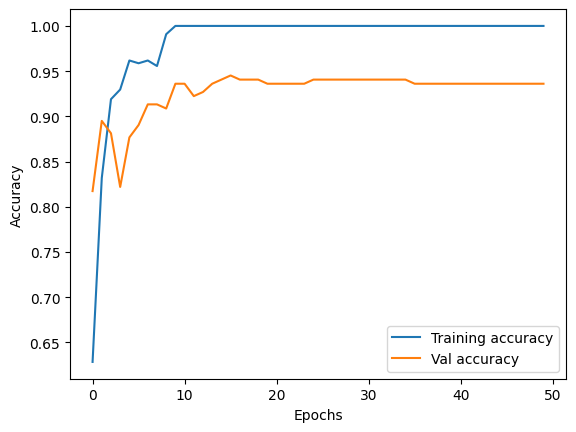

In [61]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy,label = 'Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**mean accuracy**

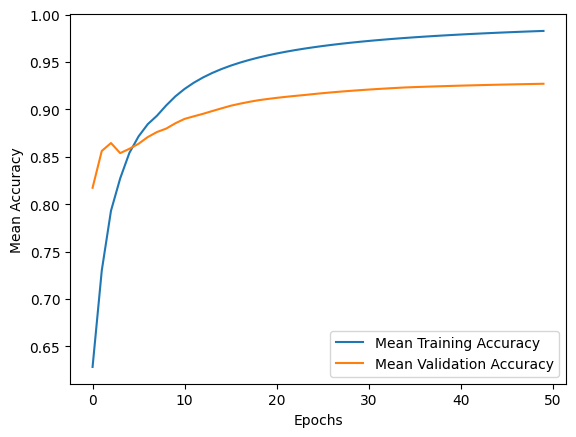

In [62]:
# Calculate cumulative mean accuracy
mean_accuracy = np.cumsum(accuracy) / np.arange(1, len(accuracy) + 1)
mean_val_accuracy = np.cumsum(val_accuracy) / np.arange(1, len(val_accuracy) + 1)

# Plot cumulative mean accuracy and validation accuracy
plt.plot(mean_accuracy, label='Mean Training Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.show()

# Test with new data

In [63]:
y_test_pred = model.predict(x_test)
print(y_test_pred.shape)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(219, 1)


In [64]:
y_pred = (y_test_pred >0.5).astype(int)
y_pred.shape

(219, 1)

In [65]:
y_test_reshape = y_test.reshape(-1,1)
y_test_reshape.shape

(219, 1)

In [66]:
print("Accuracy in test set:", accuracy_score(y_test_reshape, y_pred))
print('Accuracy in validation set:',history.history['val_accuracy'][-1])

Accuracy in test set: 0.958904109589041
Accuracy in validation set: 0.9360730648040771


# Save original model 

**Infor**<br>
Accuracy in test set: 0.958904109589041<br>
Accuracy in validation set: 0.9360730648040771<br>
Accuracy in train set: 1 <br>
Name: BrainTurmor_v1<br>

Status: Overfit

# Save original model 

In [67]:
model.save('BrainTurmor_v1.keras')